### 범람 채움(Flood fill)
연결요소의 크기를 어느정도로 하느냐에 따라 다르다.
일반적으로 상하좌우(4-연결성),사각형(8-연결성) 등을 사용한다.
이 크기만큼 연결되어 있을 때 집합 각각을 연결요소(Connected component)라고 한다. 그리고 이 연결요소들에 번호를 부여한 것을 범람 채움(Flood fill)이라고 한다.

이번에도 레나로 시작한다. OpenCV의 INV flag를 써서 -1을 빼거나 그냥 BINARY flag를 사용해서 X-1로 해도 된다. 이진화 영상에서 나타난 부분을 -1로 하는게 포인트이다.

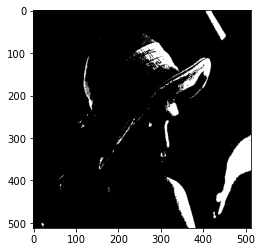

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import queue

img = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
ret,thr = cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)

flood = thr.copy()/255.
flood -=1
plt.imshow(flood.copy()*-1,cmap='gray')
plt.show()

단순 이중 for문을 돌면서 DFS로 탐색하면 재귀 호출이 깊어져 스택 오버플로우가 발생할수 있기 때문에 queue를 이용해서 함수를 작성하고 연결요소마다 번호를 부여한다.

In [2]:
def flood_fill(img,j,i,label):
    q = queue.Queue()
    q.put((j,i))
    while q.qsize():
        (y,x)= q.get()
        if img[y,x] == -1:
            left=right=x
            while left-1>0 and img[y,left-1] == -1:
                left-=1
            while right+1<img.shape[1] and img[y,right+1] ==-1:
                right+=1
            for z in range(left,right+1):
                img[y,z]=label
                if y-1>0 and img[y-1,z]==-1 and (z==left or (z-1>0 and img[y-1][z-1] !=-1)):
                    q.put((y-1,z))
                if y+1<img.shape[1] and img[y+1,z]==-1 and (z==left or (z-1>0 and img[y+1][z-1] !=-1)):
                    q.put((y+1,z))


label = 1
for j in range(img.shape[0]):
    for i in range(img.shape[1]):
        if(flood[j,i]==-1):
            flood_fill(flood,j,i,label)
            label+=1

실제 확인을 하고 싶으면 다음과 같이 하면 된다. 연결요소가 너무 짧은 경우 점조차 보기 힘들다.

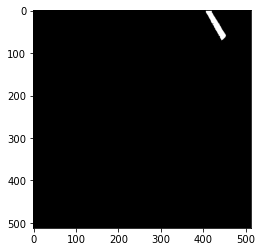

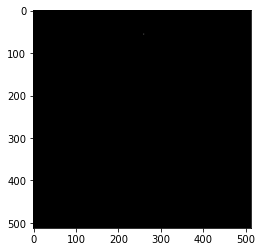

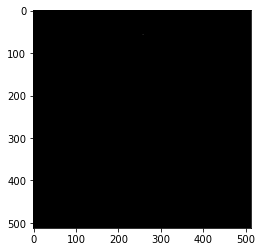

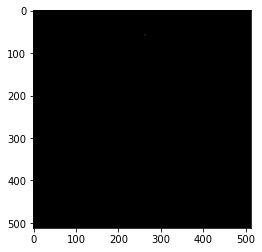

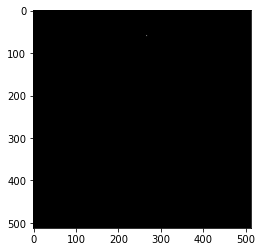

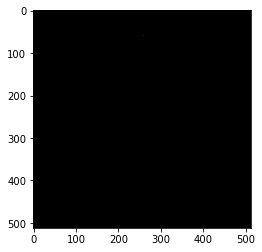

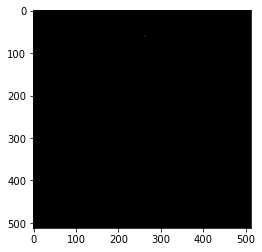

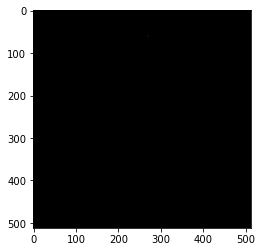

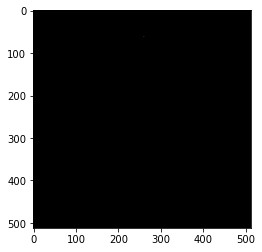

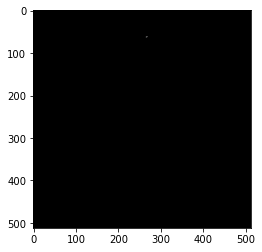

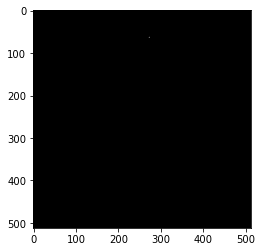

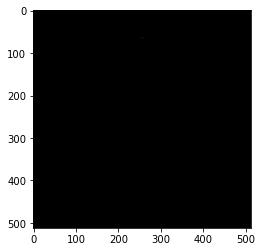

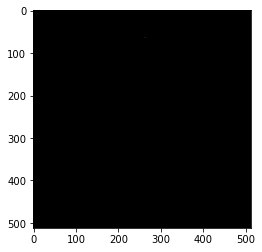

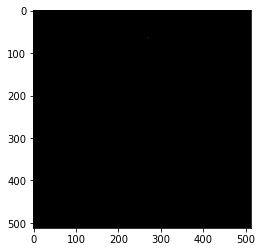

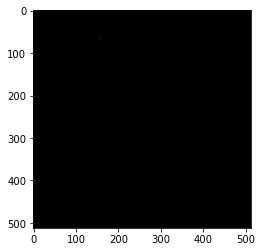

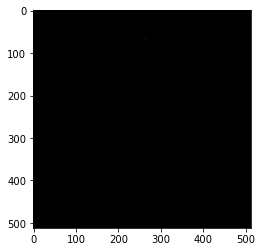

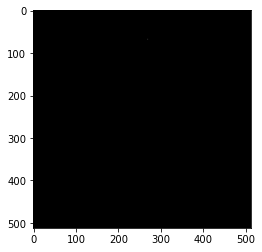

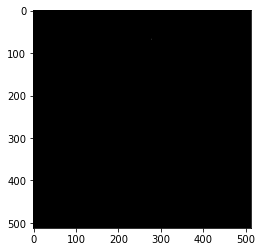

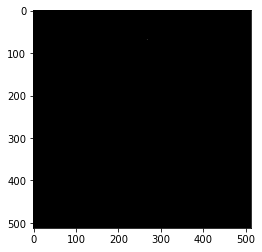

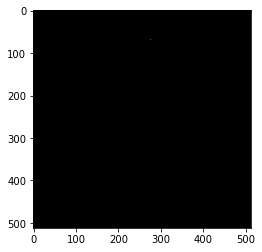

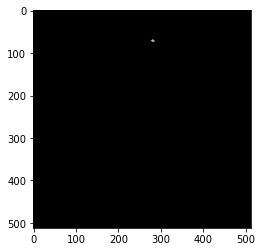

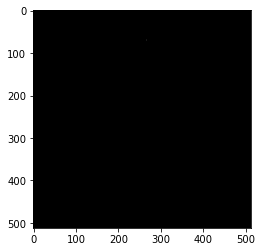

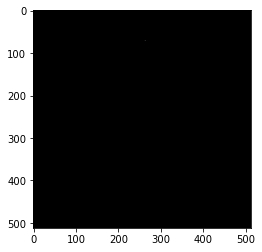

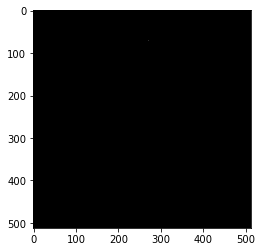

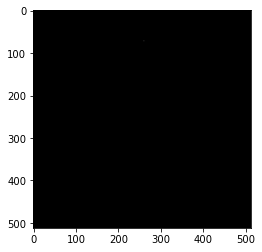

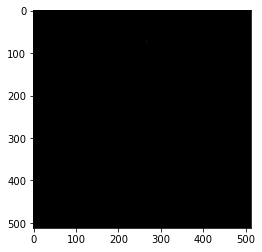

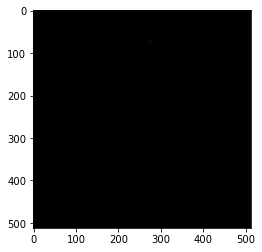

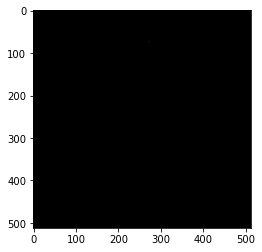

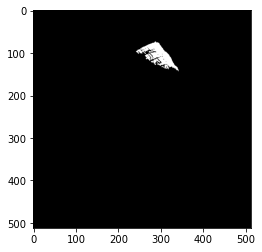

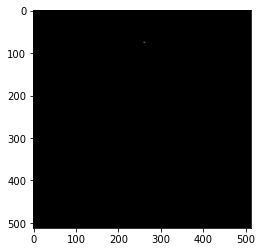

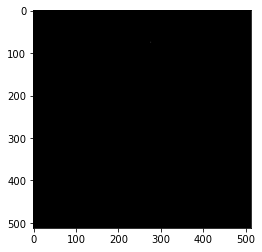

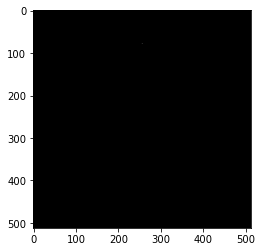

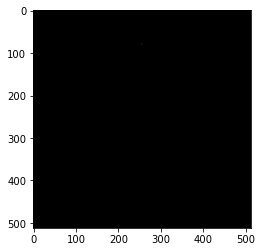

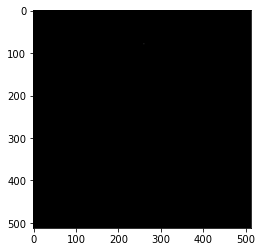

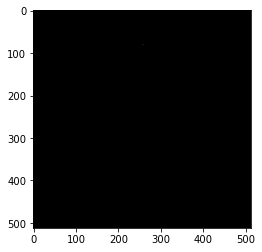

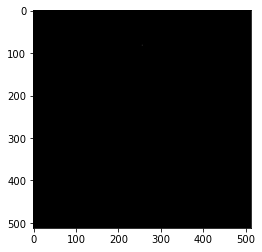

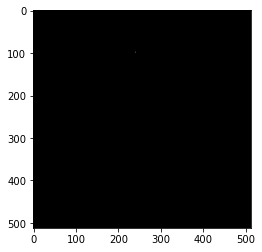

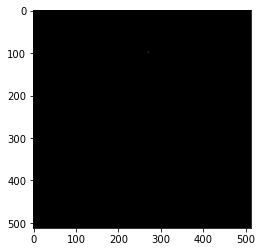

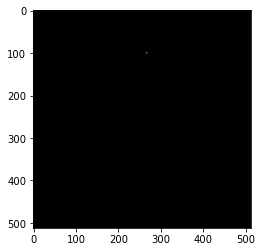

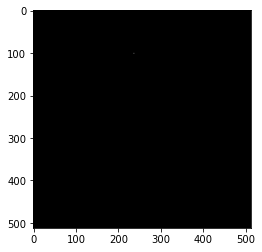

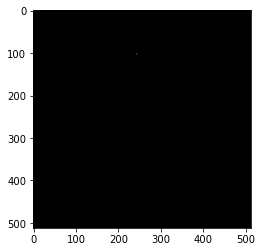

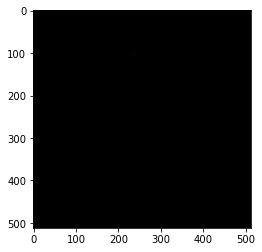

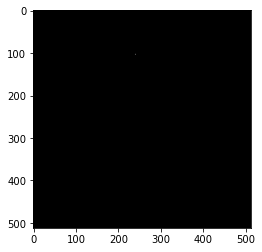

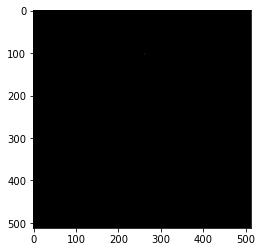

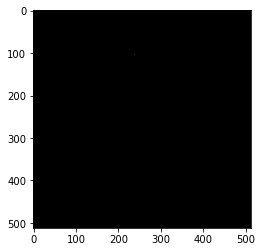

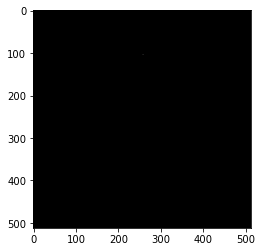

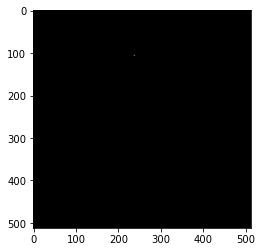

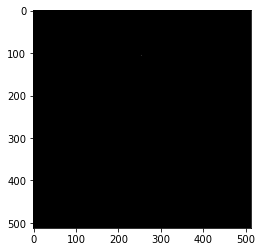

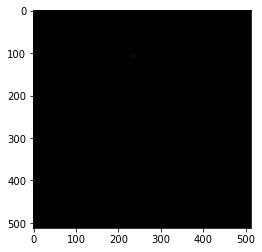

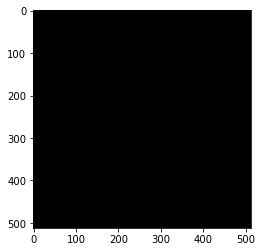

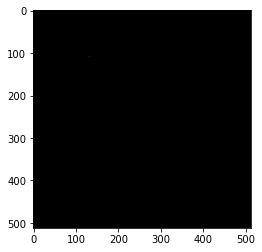

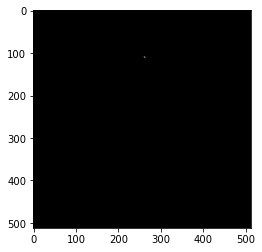

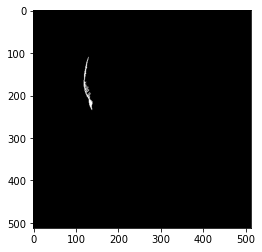

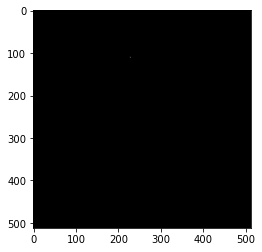

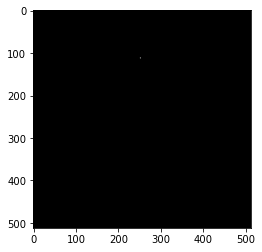

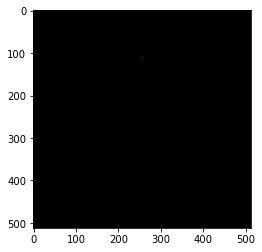

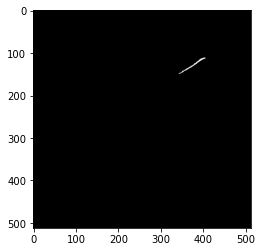

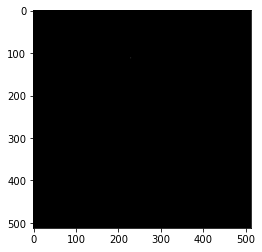

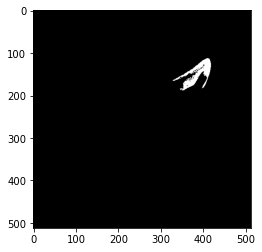

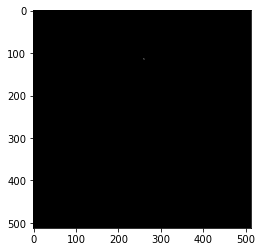

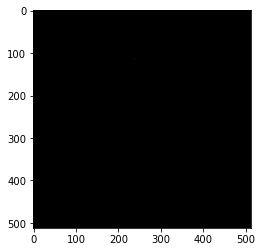

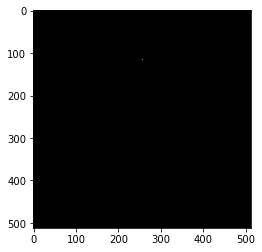

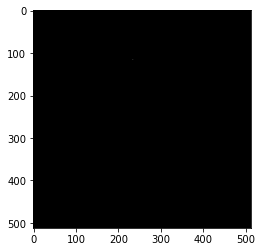

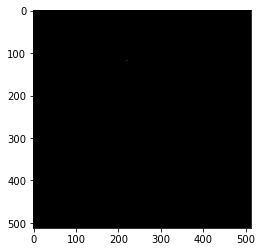

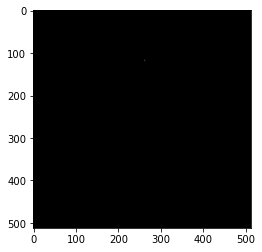

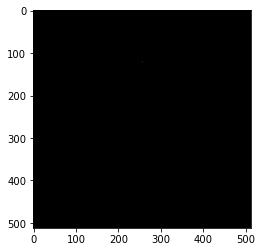

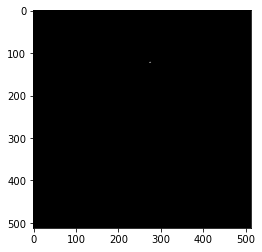

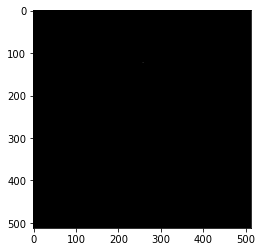

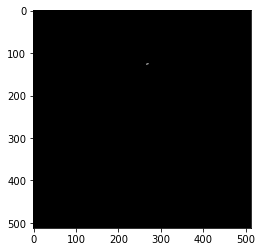

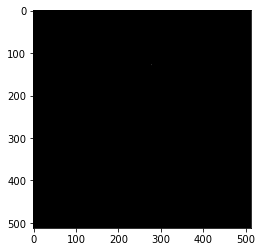

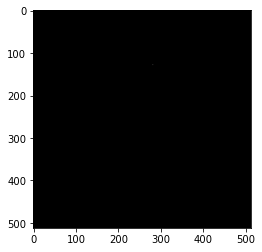

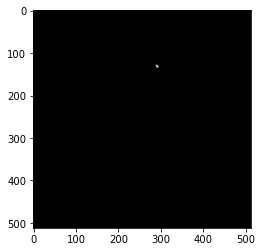

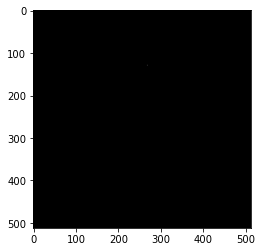

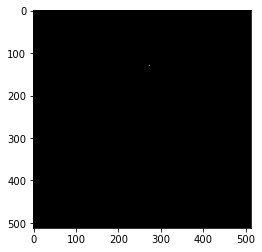

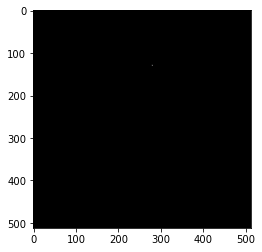

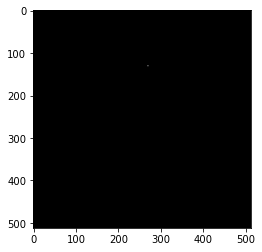

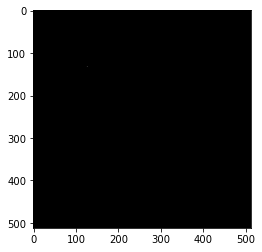

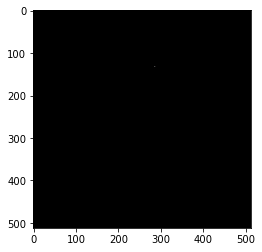

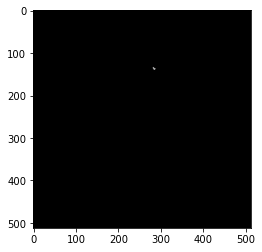

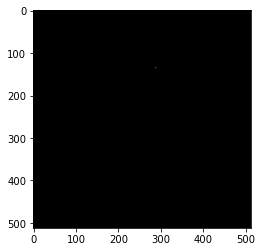

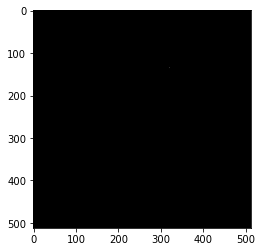

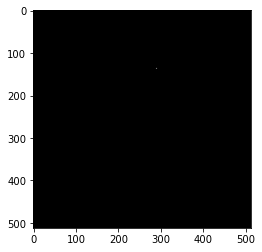

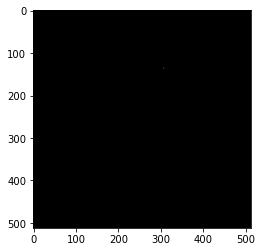

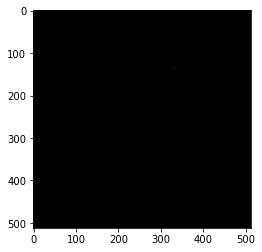

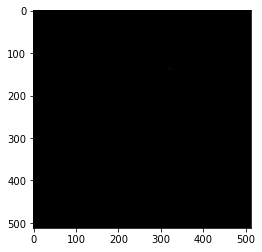

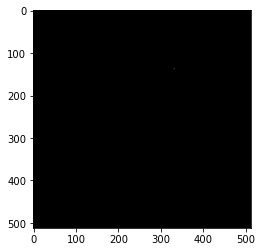

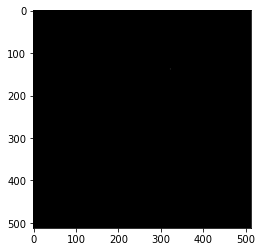

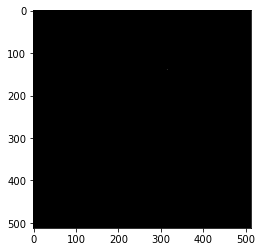

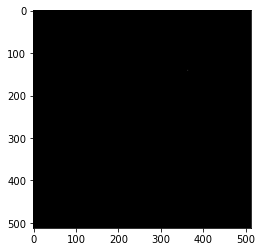

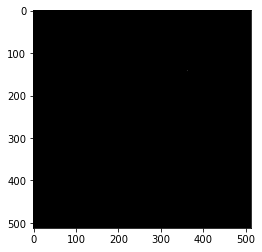

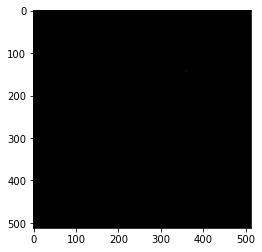

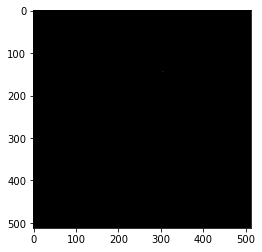

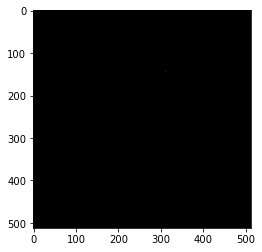

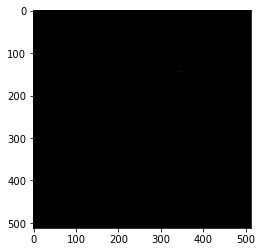

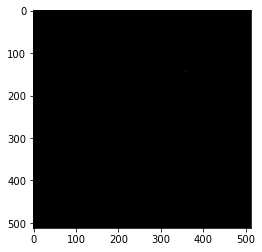

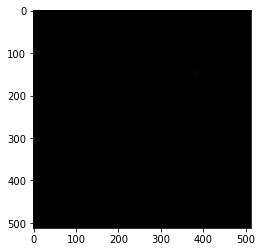

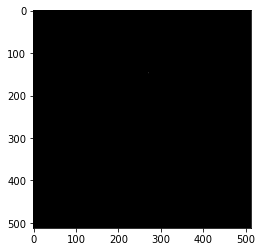

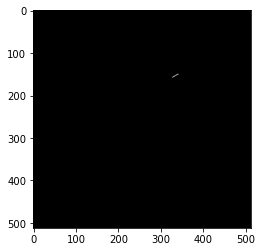

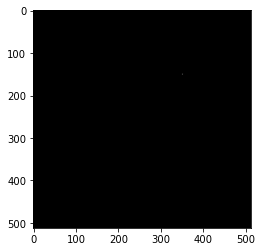

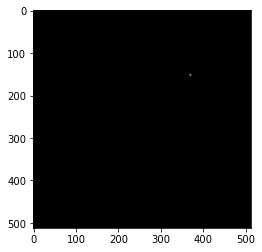

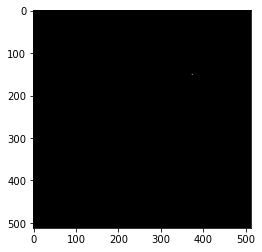

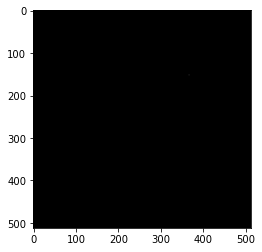

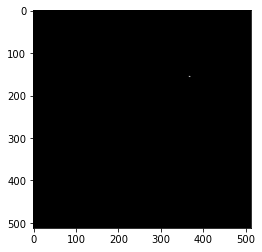

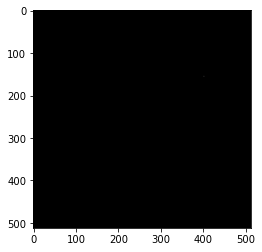

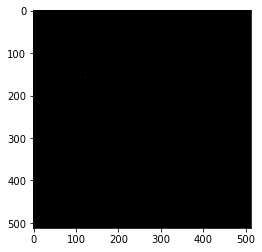

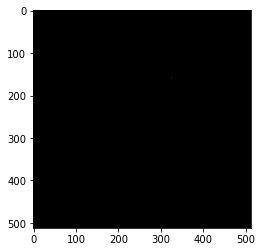

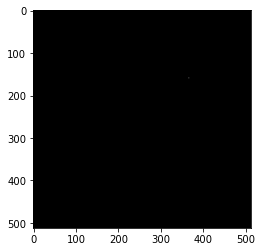

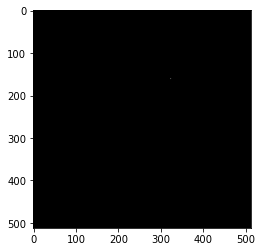

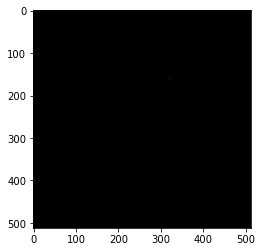

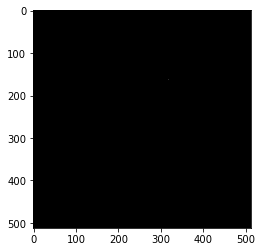

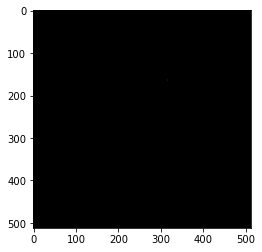

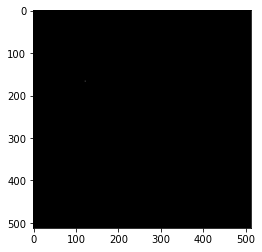

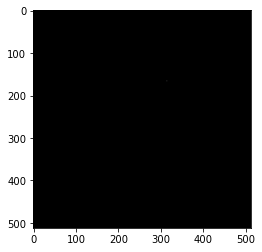

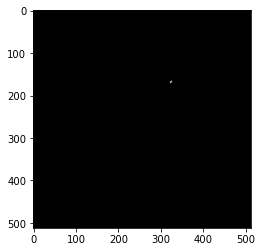

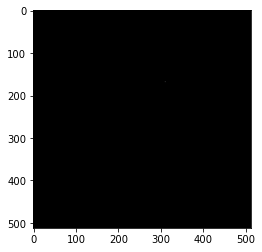

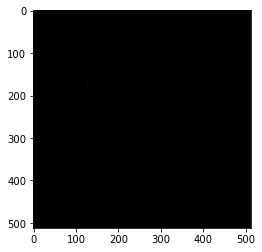

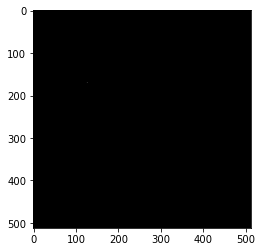

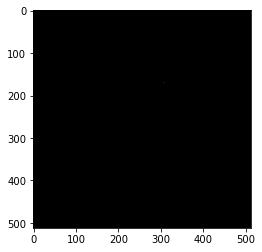

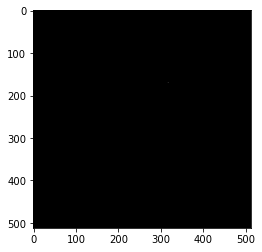

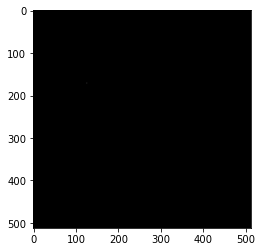

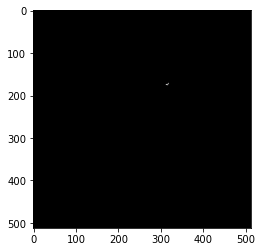

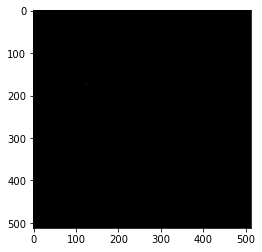

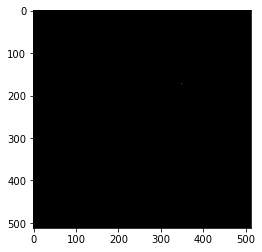

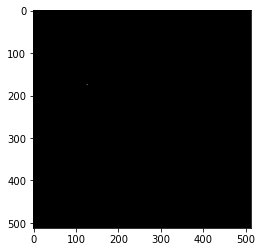

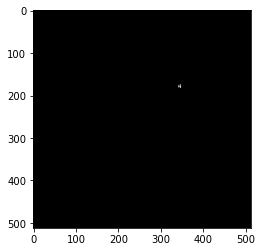

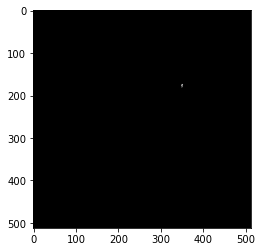

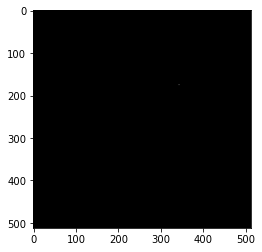

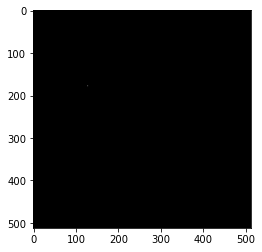

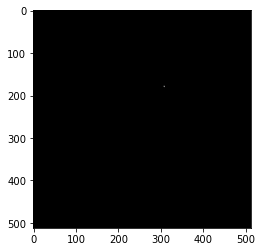

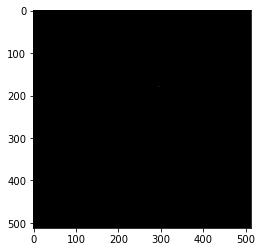

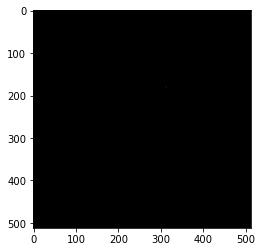

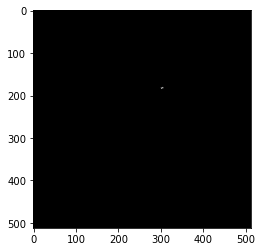

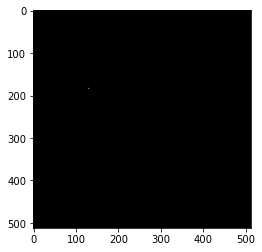

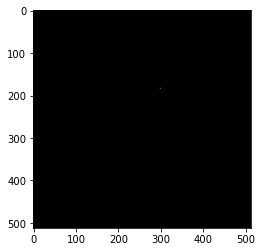

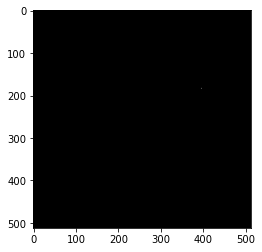

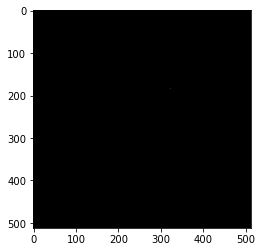

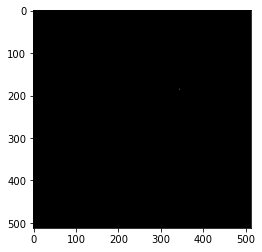

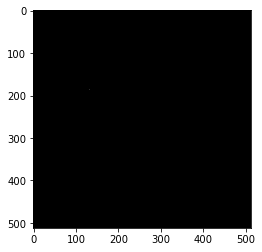

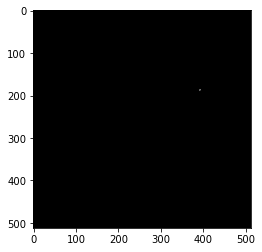

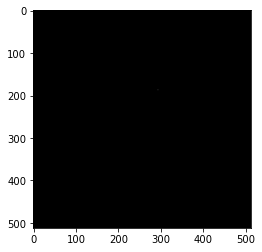

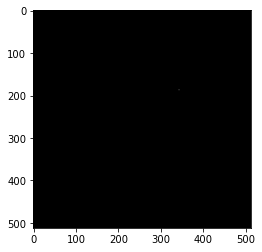

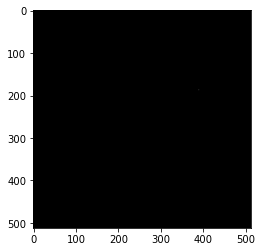

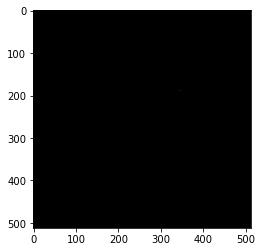

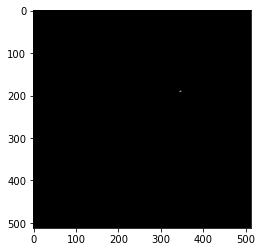

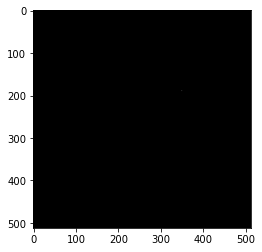

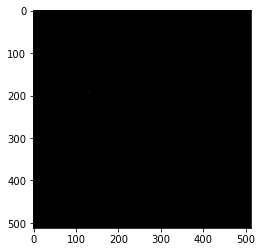

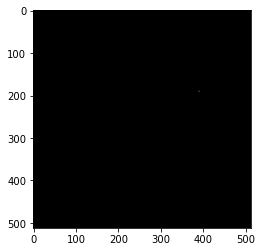

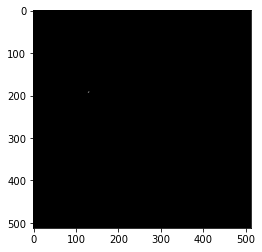

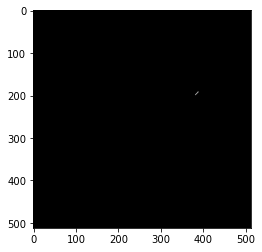

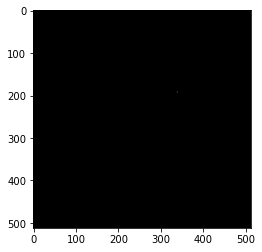

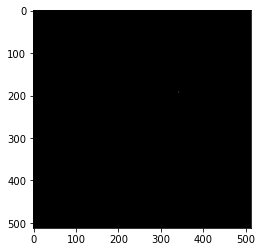

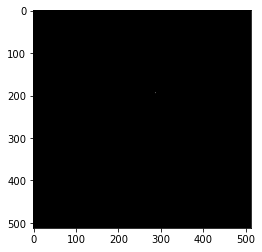

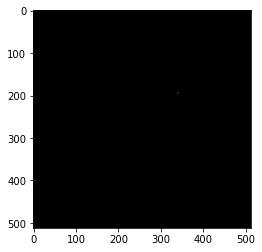

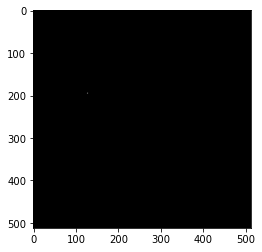

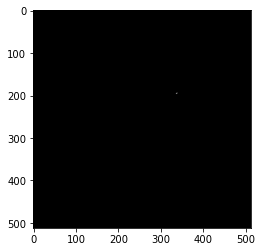

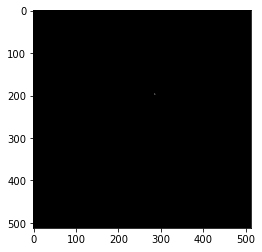

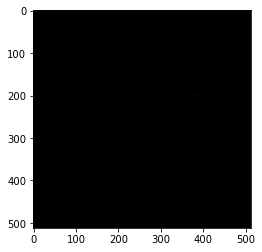

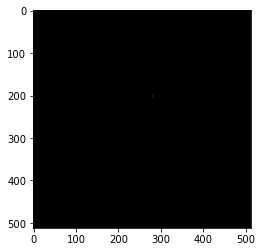

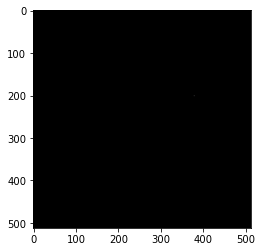

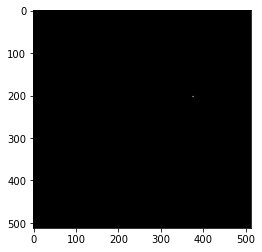

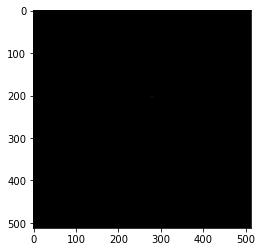

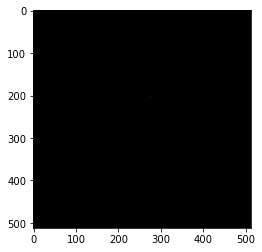

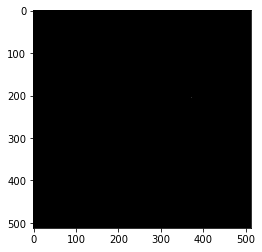

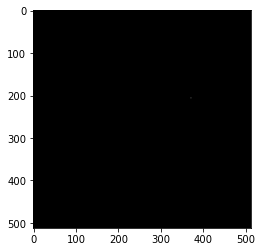

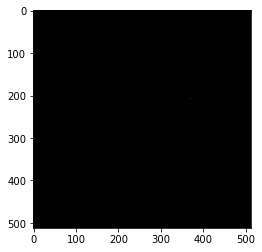

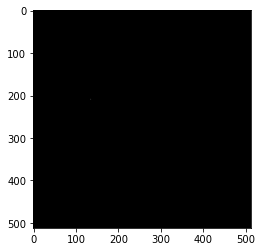

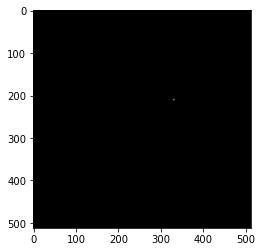

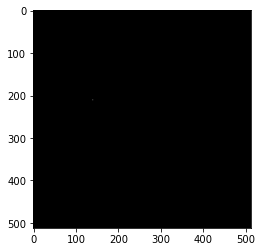

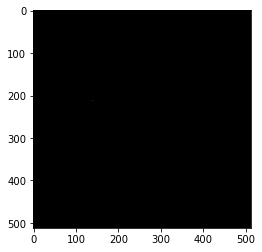

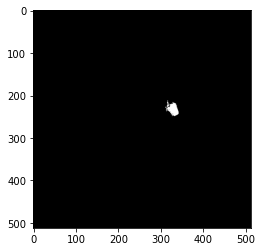

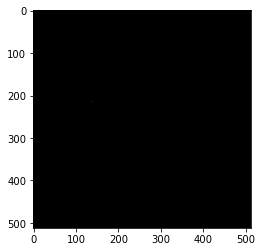

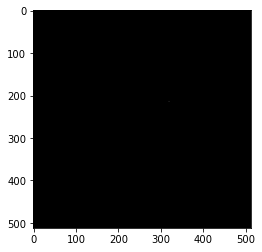

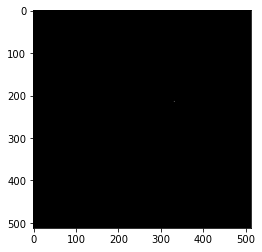

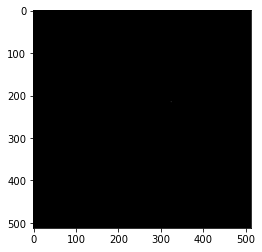

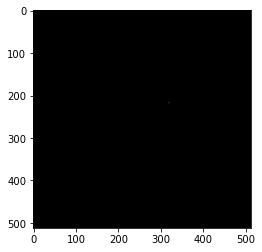

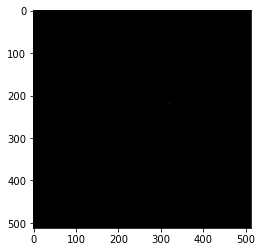

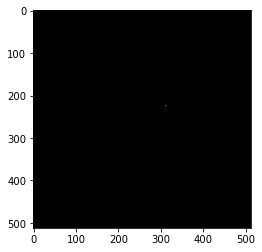

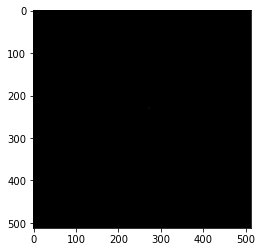

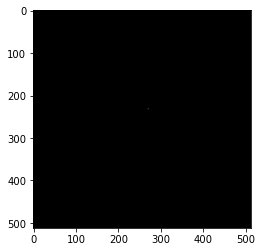

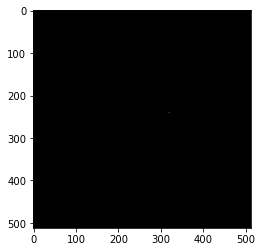

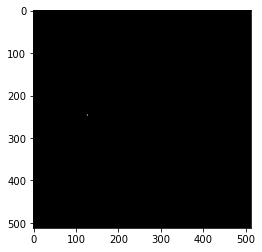

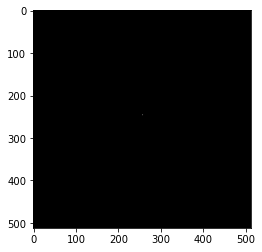

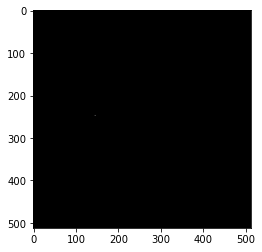

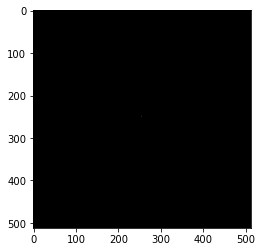

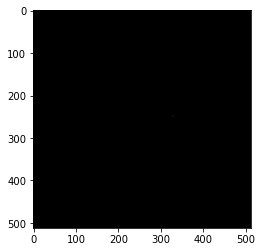

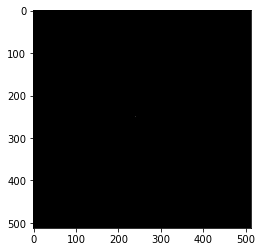

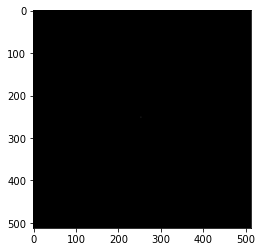

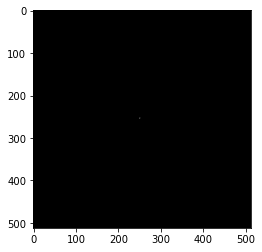

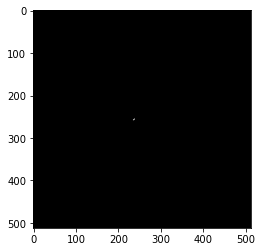

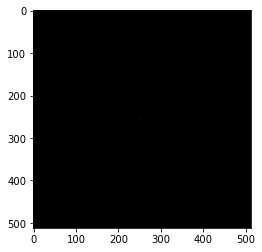

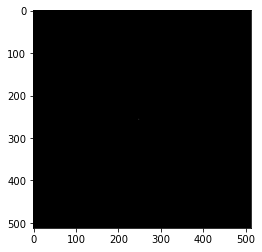

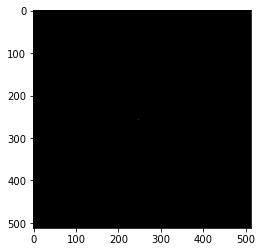

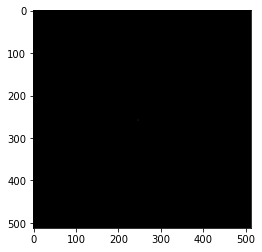

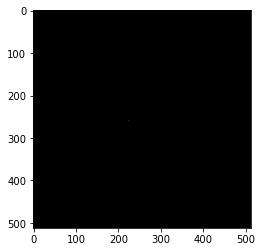

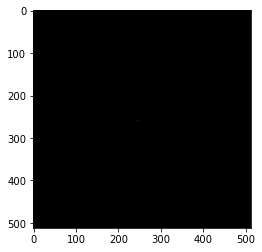

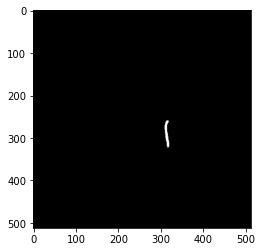

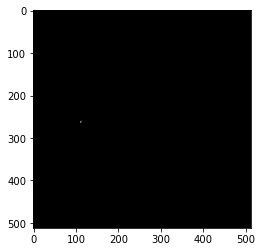

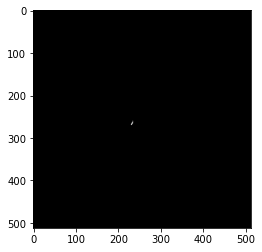

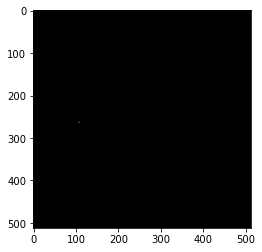

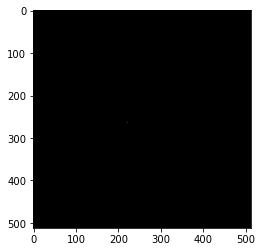

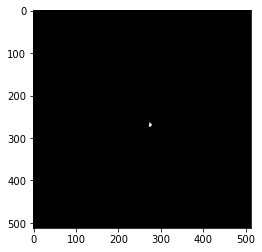

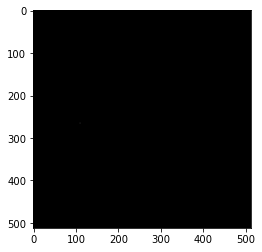

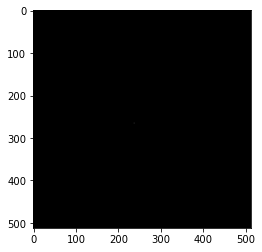

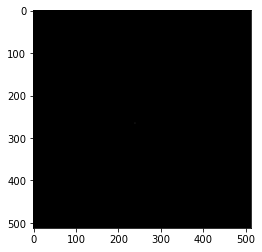

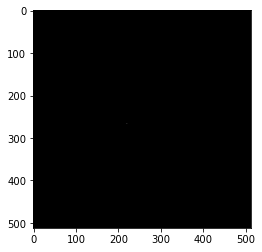

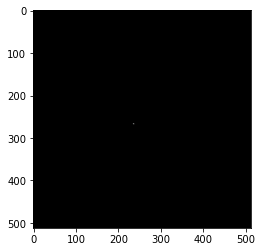

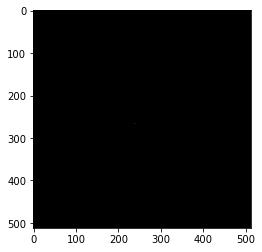

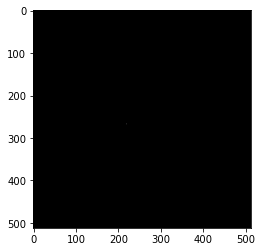

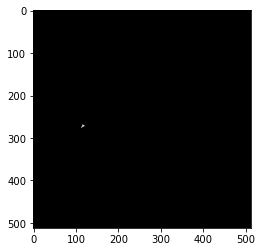

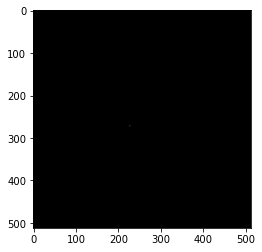

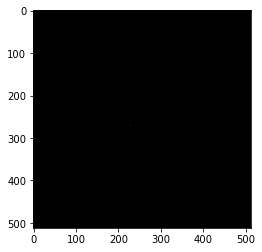

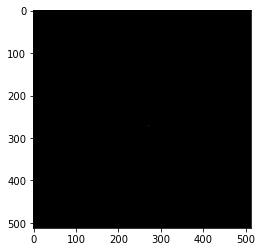

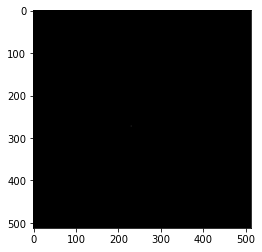

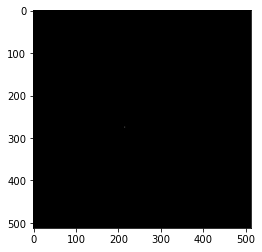

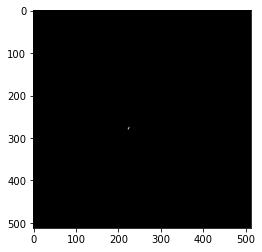

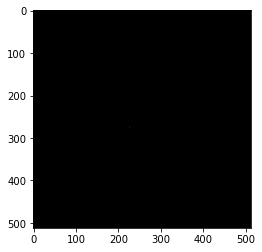

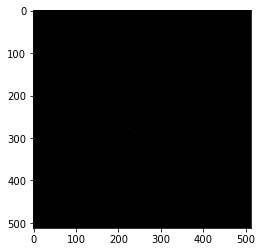

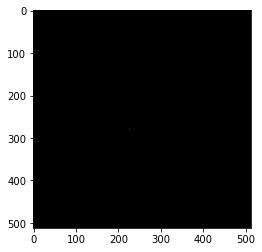

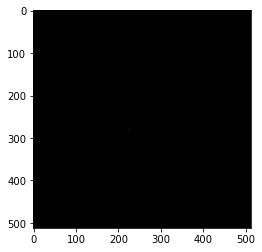

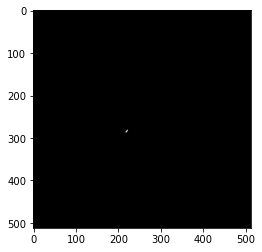

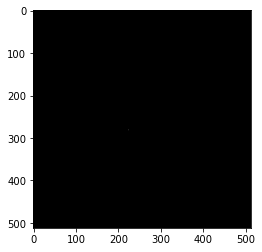

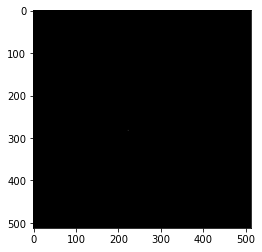

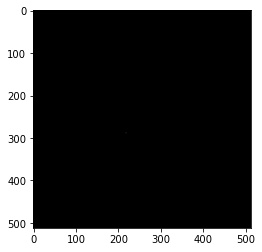

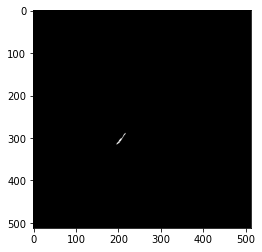

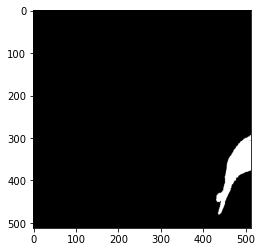

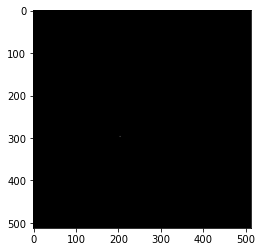

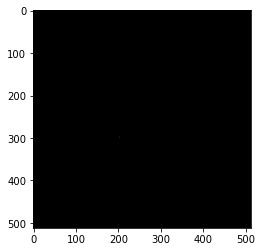

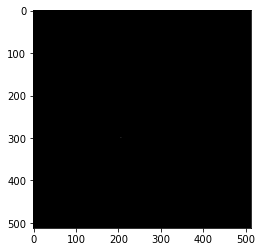

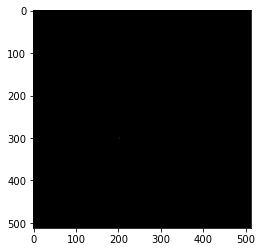

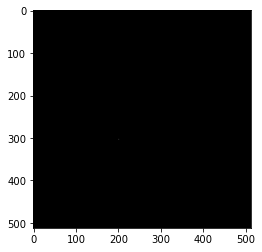

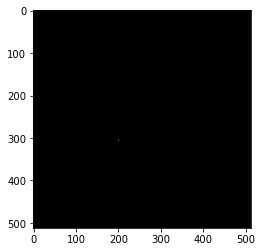

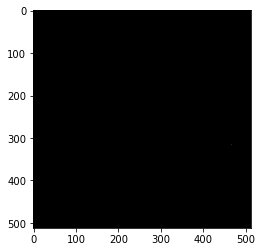

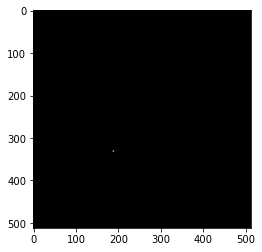

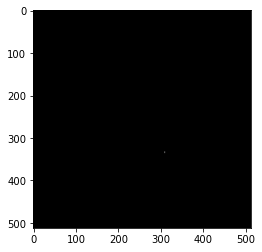

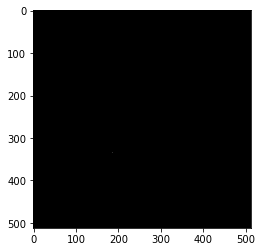

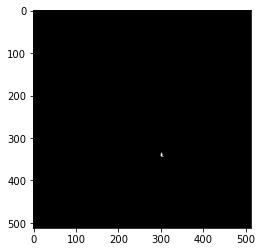

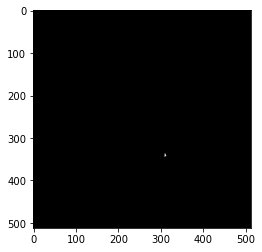

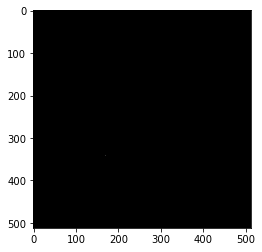

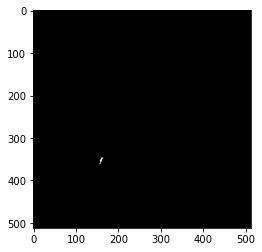

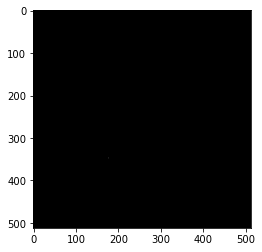

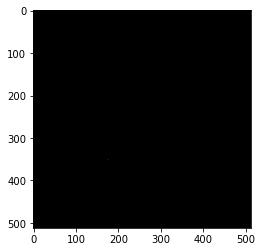

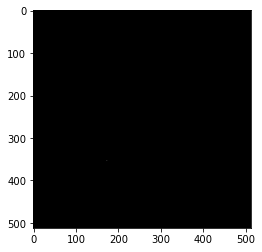

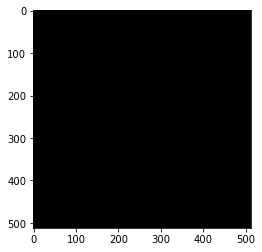

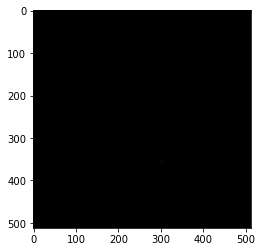

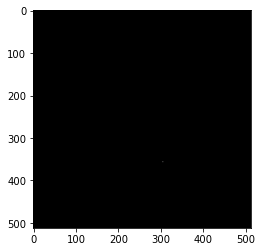

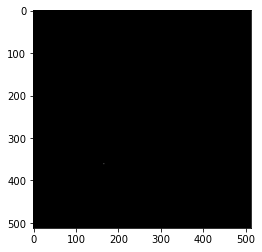

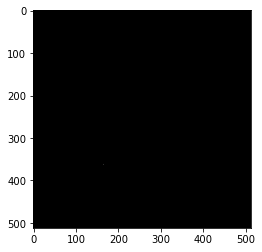

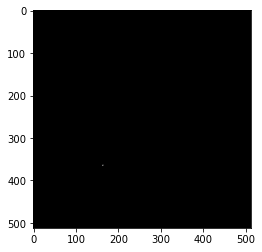

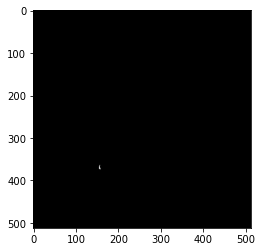

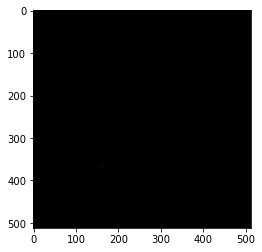

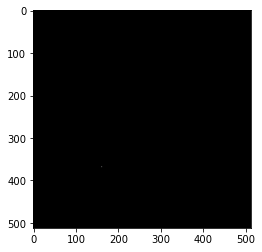

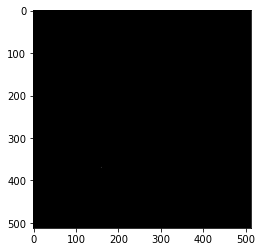

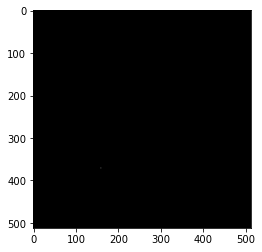

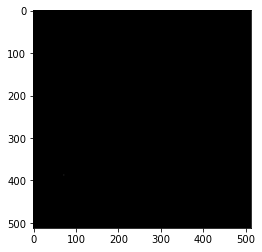

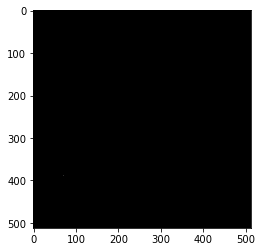

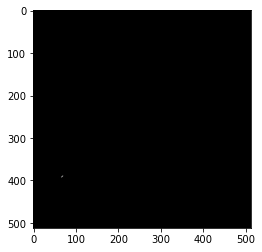

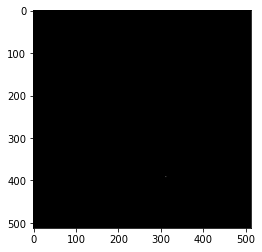

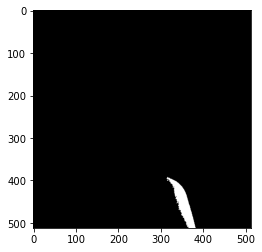

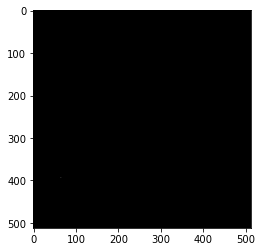

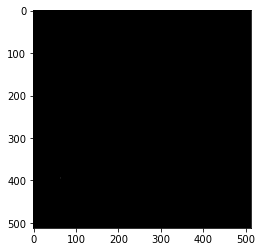

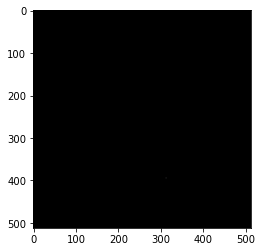

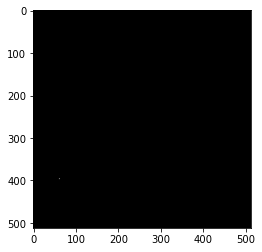

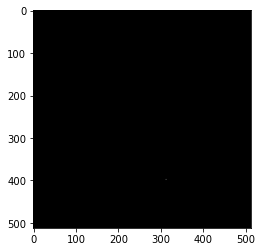

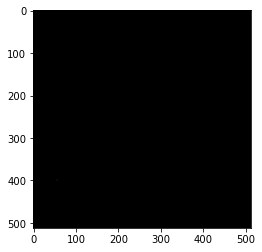

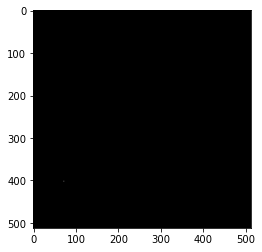

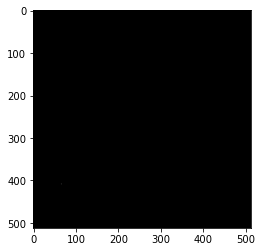

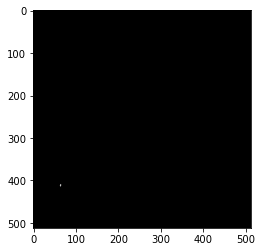

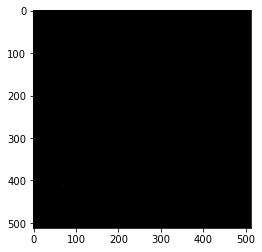

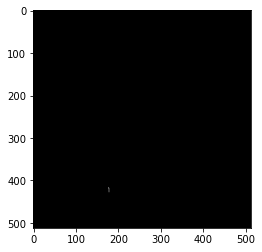

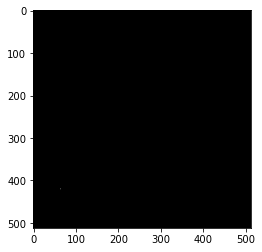

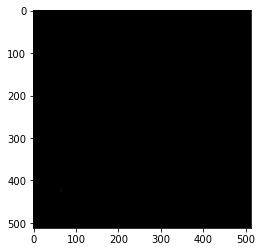

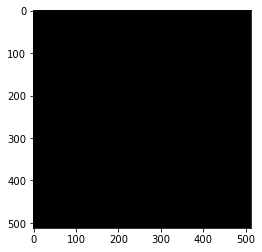

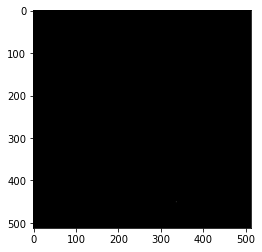

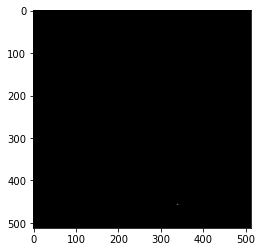

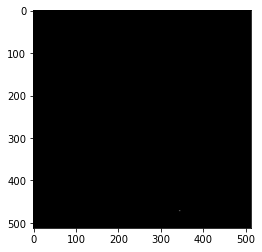

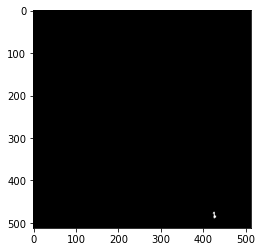

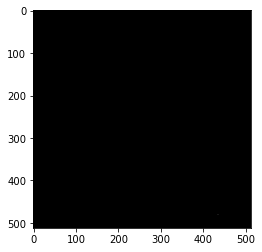

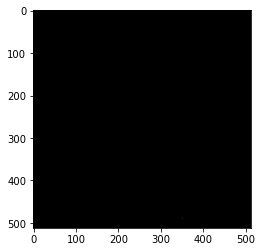

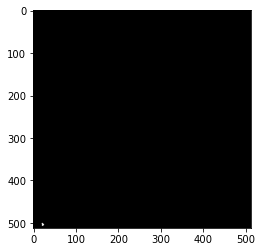

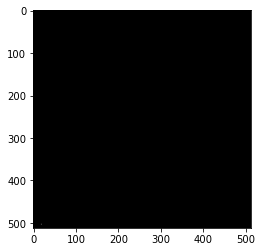

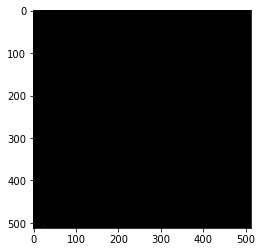

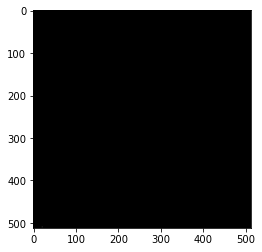

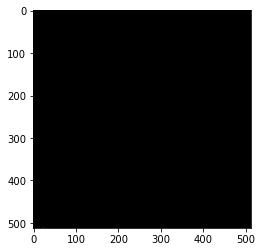

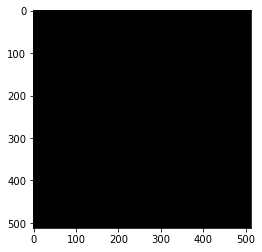

In [3]:
floos = np.zeros((img.shape[0],img.shape[1],label))
for i in range(1,label+1): # label은 1부터 시작하므로 주의한다.
    floos[...,i-1] = flood == i
floos = floos.astype(np.float32)

for i in range(label):
    plt.imshow(floos[...,i],cmap='gray')
    plt.show()